In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("/content/HR_Dataset.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df1 = df1.drop_duplicates()

df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
       'RandD':'5', 'IT':'6', 'marketing':'7', 'hr':'8', 'accounting':'9'})
df1['Departments '] = df1['Departments '].astype('float')

df1['salary']= df1['salary'].replace({'low':'0', 'medium':'1', 'high':'2'})
df1['salary'] = df1['salary'].astype('float')

<ipython-input-3-c75080ff9e94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
<ipython-input-3-c75080ff9e94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments '] = df1['Departments '].astype('float')
<ipython-input-3-c75080ff9e94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x1 = df1.drop('left', axis=1)
y1 = df1['left']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)
classification_rep = classification_report(y1_test, y1_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8340975406419341
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1998
           1       0.51      0.15      0.23       401

    accuracy                           0.83      2399
   macro avg       0.68      0.56      0.57      2399
weighted avg       0.79      0.83      0.79      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from scipy import stats

z_scores = stats.zscore(df1)
threshold = 2
outliers = (z_scores > threshold).all(axis=1)
df10 = df1[~outliers]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

x10 = df10.drop('left', axis=1)
y10 = df10['left']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

model = LogisticRegression()
model.fit(x10_train, y10_train)
y10_pred = model.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8295122967903293
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1997
           1       0.48      0.18      0.26       402

    accuracy                           0.83      2399
   macro avg       0.66      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x1_train, y1_train)

model.fit(x_resampled, y_resampled)

y_pred_re = model.predict(x1_test)
accuracy = accuracy_score(y1_test, y_pred_re)
classification_rep = classification_report(y1_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7899124635264694
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1998
           1       0.43      0.85      0.58       401

    accuracy                           0.79      2399
   macro avg       0.70      0.81      0.72      2399
weighted avg       0.87      0.79      0.81      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x1_resampled, y1_resampled = smote.fit_resample(x1_train, y1_train)

model.fit(x1_resampled, y1_resampled)
y1_pred_sam = model.predict(x1_test)
accuracy_sam = accuracy_score(y1_test, y1_pred_sam)
classification_rep = classification_report(y1_test, y1_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7782409337223843
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1998
           1       0.42      0.81      0.55       401

    accuracy                           0.78      2399
   macro avg       0.68      0.79      0.70      2399
weighted avg       0.86      0.78      0.80      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x1_resampled, y1_resampled = oversampler.fit_resample(x1_train, y1_train)

model.fit(x1_resampled, y1_resampled)
y1_pred_sam = model.predict(x1_test)
accuracy_sam = accuracy_score(y1_test, y1_pred_sam)
classification_rep = classification_report(y1_test, y1_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7790746144226761
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1998
           1       0.42      0.82      0.55       401

    accuracy                           0.78      2399
   macro avg       0.69      0.79      0.70      2399
weighted avg       0.87      0.78      0.80      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(model, n_estimators=50, random_state=42)
adaboost_classifier.fit(x1_train, y1_train)
y_pred_adaboost = adaboost_classifier.predict(x1_test)
accuracy_adaboost = accuracy_score(y1_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y1_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')

AdaBoost Accuracy: 0.8161734055856606
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1998
           1       0.13      0.02      0.03       401

    accuracy                           0.82      2399
   macro avg       0.48      0.50      0.46      2399
weighted avg       0.71      0.82      0.75      2399



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=model,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x1_train, y1_train)
y_pred_bagging = bagging_model.predict(x1_test)
accuracy_bagging = accuracy_score(y1_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y1_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Accuracy with Bagging: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1998
           1       0.46      0.16      0.23       401

    accuracy                           0.83      2399
   macro avg       0.66      0.56      0.57      2399
weighted avg       0.79      0.83      0.79      2399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_splits_values = np.arange(5,20)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x1, y1, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x1, y1, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(model, x1, y1, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

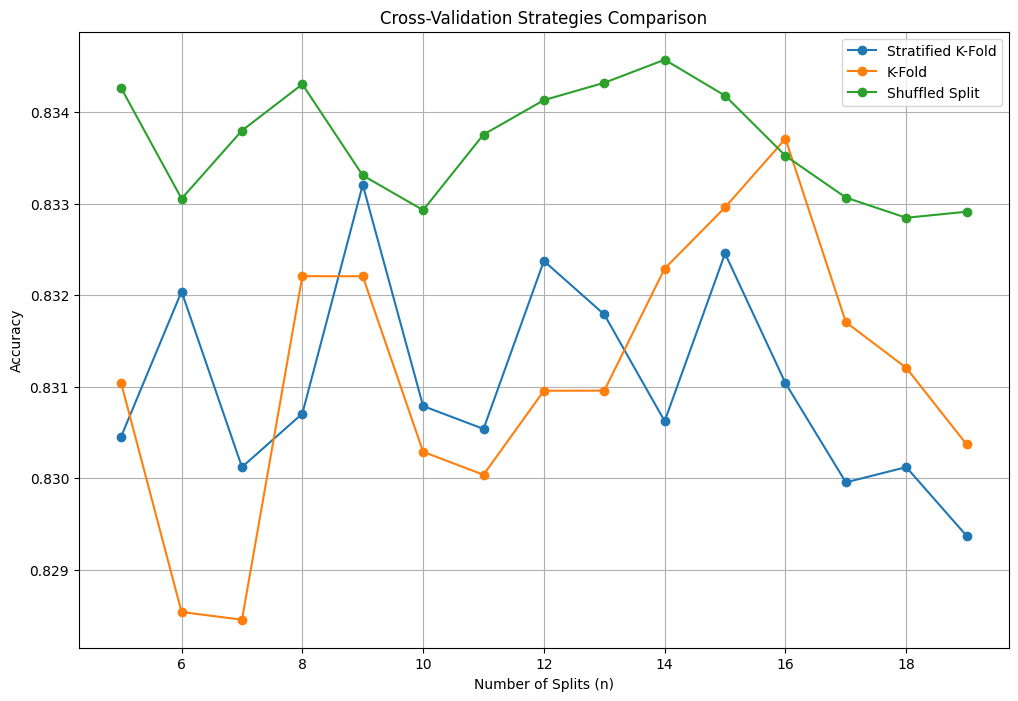

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv("/content/dataset4.csv")
df2

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df2['Over18']= df2['Over18'].replace({'Y':'0'})
df2['OverTime'] = df2['OverTime'].replace({'Yes':'1','No':'0'})
df2['JobRole'] = df2['JobRole'].replace({'Sales Executive':'0','Research Scientist':'1','Laboratory Technician':'2',
 'Manufacturing Director':'3','Healthcare Representative':'4','Manager':'5',
 'Sales Representative':'6','Research Director':'7', 'Human Resources':'8'})
df2['MaritalStatus'] = df2['MaritalStatus'].replace({'Single':'0','Married':'1','Divorced':'2'})
df2['Attrition'] = df2['Attrition'].replace({'Yes':'1','No':'0'})
df2['BusinessTravel'] = df2['BusinessTravel'].replace({'Travel_Rarely':'0','Travel_Frequently':'1','Non-Travel':'2'})
df2['Department'] = df2['Department'].replace({'Sales':'0','Research & Development':'1','Human Resources':'2'})
df2['EducationField'] = df2['EducationField'].replace({'Life Sciences':'0','Medical':'1','Marketing':'2','Technical Degree':'3','Human Resources':'4','Other':'5'})
df2['Gender'] = df2['Gender'].replace({'Female':'0','Male':'1'})

df2['Over18']= df2['Over18'].astype('int')
df2['OverTime']=df2['OverTime'].astype('int')
df2['JobRole']= df2['JobRole'].astype('int')
df2['MaritalStatus']= df2['MaritalStatus'].astype('int')
df2['Attrition'] = df2['Attrition'].astype('int')
df2['BusinessTravel'] = df2['BusinessTravel'].astype('int')
df2['Department'] = df2['Department'].astype('int')
df2['EducationField'] = df2['EducationField'].astype('int')
df2['Gender'] = df2['Gender'].astype('int')

df2 = df2.iloc[:,1:]
df2 = df2.drop_duplicates()
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x2 = df2.drop('Attrition', axis=1)
y2 = df2['Attrition']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)
classification_rep = classification_report(y2_test, y2_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8673469387755102
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from scipy import stats

z_scores = stats.zscore(df2)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
df10 = df2[~outliers]

x10 = df10.drop('Attrition', axis=1)
y10 = df10['Attrition']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

model = LogisticRegression()
model.fit(x10_train, y10_train)
y10_pred = model.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8537414965986394
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       251
           1       0.50      0.02      0.04        43

    accuracy                           0.85       294
   macro avg       0.68      0.51      0.48       294
weighted avg       0.80      0.85      0.79       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x2_resampled, y2_resampled = smote.fit_resample(x2_train, y2_train)

model.fit(x2_resampled, y2_resampled)
y2_pred_sam = model.predict(x2_test)
accuracy_sam = accuracy_score(y2_test, y2_pred_sam)
classification_rep = classification_report(y2_test, y2_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6972789115646258
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       255
           1       0.24      0.62      0.35        39

    accuracy                           0.70       294
   macro avg       0.58      0.66      0.58       294
weighted avg       0.83      0.70      0.74       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x2_resampled, y2_resampled = oversampler.fit_resample(x2_train, y2_train)

model.fit(x2_resampled, y2_resampled)
y2_pred_sam = model.predict(x2_test)
accuracy_sam = accuracy_score(y2_test, y2_pred_sam)
classification_rep = classification_report(y2_test, y2_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.61      0.73       255
           1       0.21      0.69      0.33        39

    accuracy                           0.62       294
   macro avg       0.57      0.65      0.53       294
weighted avg       0.83      0.62      0.68       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x2_train, y2_train)

model.fit(x_resampled, y_resampled)

y_pred_re = model.predict(x2_test)
accuracy = accuracy_score(y2_test, y_pred_re)
classification_rep = classification_report(y2_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6462585034013606
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       255
           1       0.23      0.69      0.34        39

    accuracy                           0.65       294
   macro avg       0.58      0.67      0.55       294
weighted avg       0.84      0.65      0.70       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(model, n_estimators=50, random_state=42)
adaboost_classifier.fit(x2_train, y2_train)
y_pred_adaboost = adaboost_classifier.predict(x2_test)
accuracy_adaboost = accuracy_score(y2_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y2_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AdaBoost Accuracy: 0.8775510204081632
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=model,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x2_train, y2_train)
y_pred_bagging = bagging_model.predict(x2_test)
accuracy_bagging = accuracy_score(y2_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y2_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Accuracy with Bagging: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_splits_values = np.arange(5,20)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x2, y2, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x2, y2, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(model, x2, y2, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

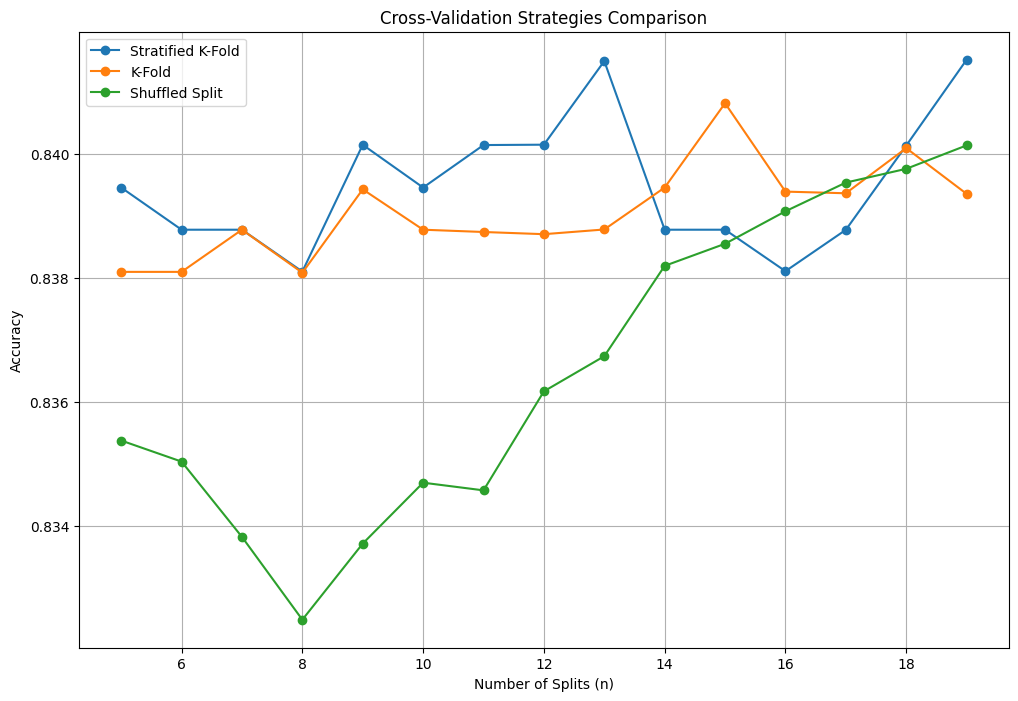

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df3 = pd.read_csv("/content/Employee.csv")
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
df3 = df3.drop_duplicates()
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [ ]:
df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
df3['EverBenched'] = df3['EverBenched'].replace({'No':'0','Yes':'1'})
df3['Gender'] = df3['Gender'].replace({'Female':'0','Male':'1'})

df3['Education']= df3['Education'].astype('int')
df3['City']=df3['City'].astype('int')
df3['Gender']= df3['Gender'].astype('int')
df3['EverBenched']= df3['EverBenched'].astype('int')

df3

<ipython-input-24-766065f16b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
<ipython-input-24-766065f16b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
<ipython-input-24-766065f16b11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,1,2,31,0,0,2,0
4647,0,2016,1,3,30,1,0,2,0
4649,1,2013,1,2,37,1,0,2,1
4650,1,2018,2,3,27,1,0,5,1


In [ ]:
x3 = df3.drop('LeaveOrNot', axis=1)
y3 = df3['LeaveOrNot']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)

model = LogisticRegression()
model.fit(x3_train, y3_train)
y3_pred =model.predict(x3_test)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6401446654611211
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       332
           1       0.60      0.30      0.40       221

    accuracy                           0.64       553
   macro avg       0.63      0.58      0.57       553
weighted avg       0.63      0.64      0.61       553



In [ ]:
from scipy import stats

z_scores = stats.zscore(df3)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
df10 = df3[~outliers]

x10 = df10.drop('LeaveOrNot', axis=1)
y10 = df10['LeaveOrNot']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

model = LogisticRegression()
model.fit(x10_train, y10_train)
y10_pred = model.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6274864376130199
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       327
           1       0.57      0.34      0.43       226

    accuracy                           0.63       553
   macro avg       0.61      0.58      0.58       553
weighted avg       0.62      0.63      0.60       553



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x3_resampled, y3_resampled = smote.fit_resample(x3_train, y3_train)

model.fit(x3_resampled, y3_resampled)
y3_pred_sam = model.predict(x3_test)
accuracy_sam = accuracy_score(y3_test, y3_pred_sam)
classification_rep = classification_report(y3_test, y3_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6166365280289331
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       332
           1       0.52      0.55      0.54       221

    accuracy                           0.62       553
   macro avg       0.60      0.61      0.60       553
weighted avg       0.62      0.62      0.62       553



In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x3_resampled, y3_resampled = oversampler.fit_resample(x3_train, y3_train)

model.fit(x3_resampled, y3_resampled)
y3_pred_sam = model.predict(x3_test)
accuracy_sam = accuracy_score(y3_test, y3_pred_sam)
classification_rep = classification_report(y3_test, y3_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6148282097649186
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       332
           1       0.52      0.57      0.54       221

    accuracy                           0.61       553
   macro avg       0.61      0.61      0.61       553
weighted avg       0.62      0.61      0.62       553



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x3_train, y3_train)

model.fit(x_resampled, y_resampled)

y_pred_re = model.predict(x3_test)
accuracy = accuracy_score(y3_test, y_pred_re)
classification_rep = classification_report(y3_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6039783001808319
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       332
           1       0.50      0.54      0.52       221

    accuracy                           0.60       553
   macro avg       0.59      0.59      0.59       553
weighted avg       0.61      0.60      0.61       553



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(model, n_estimators=50, random_state=42)
adaboost_classifier.fit(x3_train, y3_train)
y_pred_adaboost = adaboost_classifier.predict(x3_test)
accuracy_adaboost = accuracy_score(y3_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y3_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')

AdaBoost Accuracy: 0.6274864376130199
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.91      0.75       332
           1       0.60      0.20      0.30       221

    accuracy                           0.63       553
   macro avg       0.62      0.56      0.52       553
weighted avg       0.62      0.63      0.57       553



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=model,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x3_train,y3_train)
y_pred_bagging = bagging_model.predict(x3_test)
accuracy_bagging = accuracy_score(y3_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y3_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy with Bagging: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       332
           1       0.61      0.30      0.40       221

    accuracy                           0.64       553
   macro avg       0.63      0.58      0.57       553
weighted avg       0.63      0.64      0.61       553



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

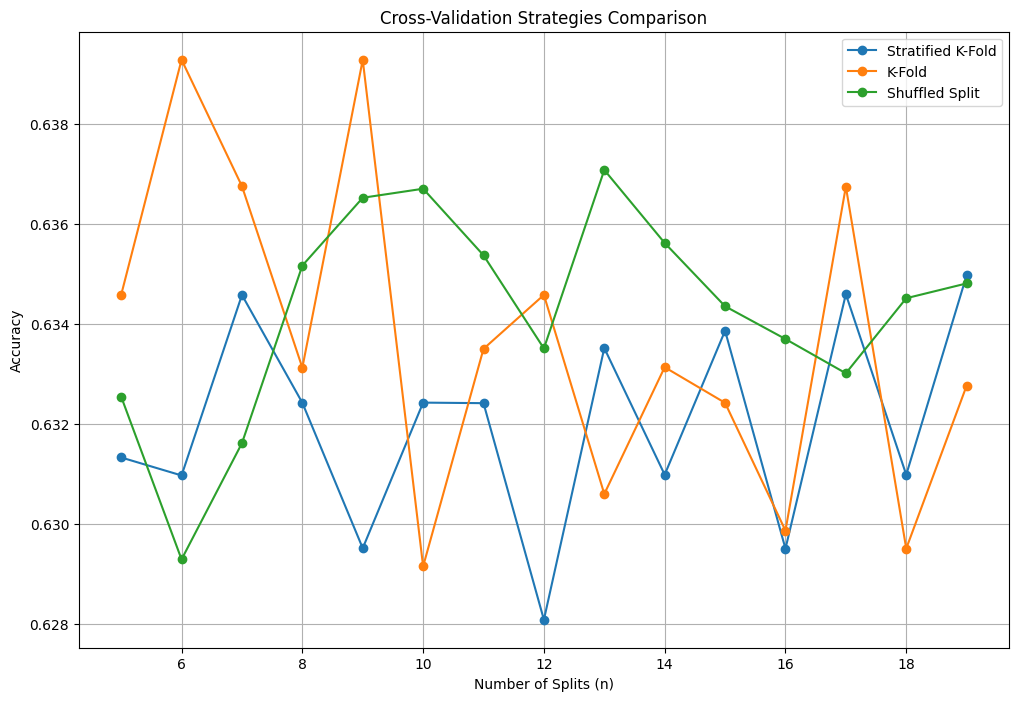

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_splits_values = np.arange(5,20)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x3, y3, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, x3, y3, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(model, x3, y3, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))


plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()